In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pprint as pp

import json
import os
import timeit
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR, SVC
from sklearn import svm

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/classement2011.csv")
df1.head()

,id,nom,elo
0,94021,ONE DU RIB,1491.915345
1,2018313,QUAKER JET,1573.571730
2,2023953,READY CASH,1593.437644
3,2007062,PREMIERE STEED,1487.988380
4,85327,NOUBA DU SAPTEL,1526.174892


In [ ]:
df1.describe()

,id,elo
count,3.515300e+04,35153.000000
mean,2.062308e+06,1500.000215
std,4.005198e+05,20.666574
min,3.202300e+04,1407.890317
25%,2.076899e+06,1489.183668
50%,2.142683e+06,1496.670447
75%,2.210461e+06,1509.552520
max,2.278974e+06,1695.726760


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


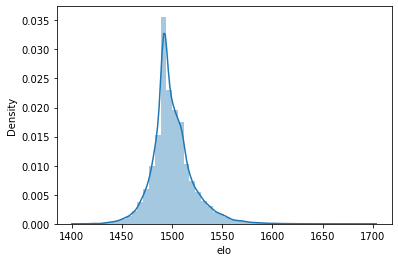

In [ ]:
plot = sn.distplot(df1['elo'])
plot.get_figure().savefig('/content/drive/MyDrive/.csv')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataScience/horsesDataPointVirg.csv", index_col=False, sep=";")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31,32,47,48,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,raceId,horse_name,horse_pmuName,horse_genyName,horse_genyId,horse_canalturfName,horse_canalturfId,hasSulky,age,partantNum,breed,sex,blinkers,ownerName,trainer_name,trainer_pmuName,trainer_genyName,trainer_canalturfId,trainer_canalturfName,raiserName,allure,horseshoe,jockey_name,jockey_pmuName,jockey_genyName,jockey_canalturfName,jockey_canalturfId,robe,weight,musique,pregnant,stats_firstRace,stats_numberRaces,stats_wonRaces,stats_places,stats_secondPlaces,stats_thirdPlaces,stats_earnMoneyTotal,stats_earnMoneyFirst,...,odds_pmu_chronological_3_epoch,odds_pmu_chronological_4_ratio,odds_pmu_chronological_4_epoch,odds_pmu_chronological_5_ratio,odds_pmu_chronological_5_epoch,odds_pmu_chronological_6_ratio,odds_pmu_chronological_6_epoch,odds_pmu_chronological_7_ratio,odds_pmu_chronological_7_epoch,odds_pmu_chronological_8_ratio,odds_pmu_chronological_8_epoch,odds_pmu_chronological_9_ratio,odds_pmu_chronological_9_epoch,odds_pmu_chronological_10_ratio,odds_pmu_chronological_10_epoch,odds_pmu_chronological_11_ratio,odds_pmu_chronological_11_epoch,odds_geny_lastDirect_ratio,odds_betclic_lastDirect_ratio,odds_unibet_lastDirect_ratio,casaques_0_url,casaques_1_url,moneyWon,results_position,results_totalTimeMs,results_kmReducedMs,ropePlace,handicapValue,pedigree_fatherMother,results_distancePrevHorse,weightBefore,rateReclamation,casaques_2_url,casaques_2_y,casaques_2_width,casaques_2_height,odds_zeturf_lastDirect_ratio,casaques_1_y,casaques_1_width,casaques_1_height
0,0,pmu_race:01012017/R1/C10,CALIE DU TROT,CALIE DU TROT,CALIE DU TROT,2421081,CALIE DU TROT,186969.0,False,5,1,TROTTEUR FRANCAIS,F,NONE,N. QUITTET,F. QUITTET,F. QUITTET,Fabrice Quittet,15316.0,F. QUITTET,M. Patrick Germain PIQUET,TROT,ALL,A. DABOUIS,A. DABOUIS,Antoine Dabouis,A. DABOUIS,14016.0,020_BAI,570.0,Da8aDaDaDaDm2a6aDa8a,False,False,32.0,1.0,9.0,1.0,0.0,1367000.0,540000.0,...,1.483286e+12,23.0,1.483287e+12,23.0,1.483287e+12,24.0,1.483288e+12,25.0,1.483288e+12,28.0,1.483289e+12,27.0,1.483290e+12,28.0,1.483290e+12,62.0,1.483291e+12,28.0,34.4,46.1,https://turfinfo.pmucdn.fr/casaques/01012017/R...,https://media.genybet.fr/web/image/casaque/72/...,13670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,pmu_race:01012017/R1/C10,COLANIE,COLANIE,COLANIE,2449264,COLANIE,198594.0,False,5,2,TROTTEUR FRANCAIS,F,NONE,Ecurie Sébastien HARDY,S. HARDY,S. HARDY,Sébastien Hardy,745.0,S. HARDY,Mme Annie FERRON,TROT,NONE,MLLE NOEMIE HARDY,MLLE NOEMIE HARDY,Mlle Noémie Hardy,MLLE N. HARDY,14830.0,020_BAI,550.0,0a8m0a4m4mDa6aDm9a5a,False,False,25.0,1.0,11.0,0.0,2.0,1400000.0,540000.0,...,1.483286e+12,27.0,1.483287e+12,27.0,1.483287e+12,27.0,1.483288e+12,28.0,1.483288e+12,27.0,1.483289e+12,25.0,1.483290e+12,27.0,1.483290e+12,49.0,1.483291e+12,33.0,24.5,24.4,https://turfinfo.pmucdn.fr/casaques/01012017/R...,https://media.genybet.fr/web/image/casaque/29/...,14000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,pmu_race:01012017/R1/C10,CHARMANTE LULU,CHARMANTE LULU,CHARMANTE LULU,2433769,CHARMANTE LULU,192881.0,False,5,3,TROTTEUR FRANCAIS,F,NONE,Michaël CHARLES,V. BRAZON,V. BRAZON,Vincent Brazon,1454.0,A. PACARY,M. Arnaud CHARLES,TROT,ALL,MLLE AUDREY LAROCHE,MLLE AUDREY LAROCHE,Mlle Audrey Laroche,MLLE A. LAROCHE,10672.0,001_ALEZAN,570.0,7m7a8a8a7a0a2a4a4a9a,False,False,23.0,0.0,14.0,2.0,2.0,1996000.0,0.0,...,1.483286e+12,17.0,1.483287e+12,17.0,1.483287e+12,17.0,1.483288e+12,19.0,1.483288e+12,21.0,1.483289e+12,21.0,1.483290e+12,23.0,1.483290e+12,51.0,1.483291e+12,50.0,27.3,37.7,https://turfinfo.pmucdn.fr/casaques/01012017/R...,https://media.genybet.fr/web/image/casaque/94/...,19960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,pmu_race:01012017/R1/C10,CAQUISE DE NGANDA,CAQUISE DE NGANDA,CAQUISE DE NGANDA,2480332,CAQUISE DE NGANDA,215352.0,False,5,4,TROTTEUR FRANCAIS,F,NONE,Ecurie Sébastien HARDY,S. HARDY,S. HARDY,Sébastien Hardy,745.0,M. VARIN,M. Hubert CHRISTOPHE,TROT,NONE,D. DULONG,D. DULONG,Dylan Dulong

# Visualisation
## Nombre de chevaux dans une course


In [ ]:
horses_per_race = df.groupby('raceId').size()
print(type(horses_per_race))

<class 'pandas.core.series.Series'>


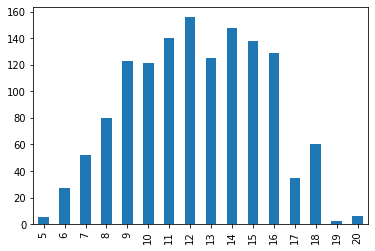

In [ ]:
horses_per_race.value_counts(sort=False).plot.bar(x='Nombre de chevaux', y='Nombre de courses')

## Répartition des ages des chevaux


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


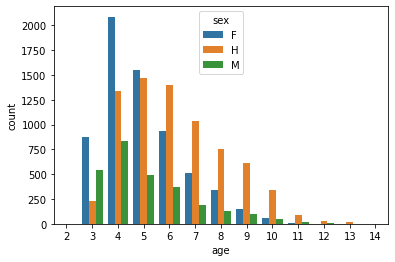

In [ ]:
sn.countplot(df['age'], hue=df['sex'])

On remarque que les lettres H et M codent le sexe masculin. Utilisons M.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


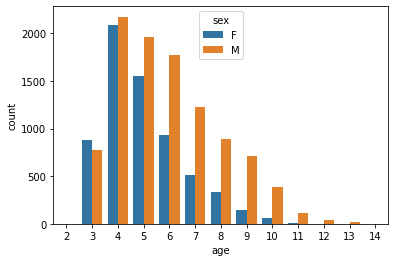

In [ ]:
df['sex'][df['sex']=='H'] = 'M'
sn.countplot(df['age'], hue=df['sex'])

## Age des chevaux gagnants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


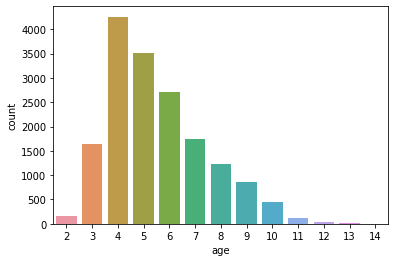

In [ ]:
sn.countplot(df['age'][df['results_position'] == 1])
sn.countplot(df['age'])

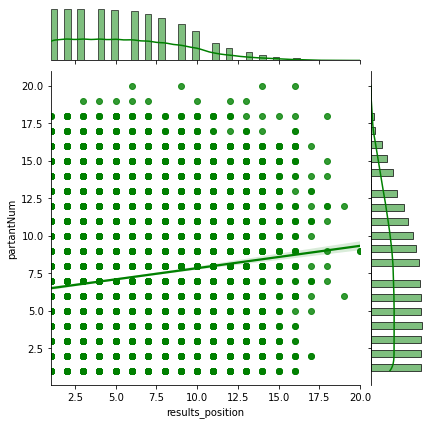

In [ ]:
sn.jointplot(x='results_position', y='partantNum', data=df, kind='reg', color='green')

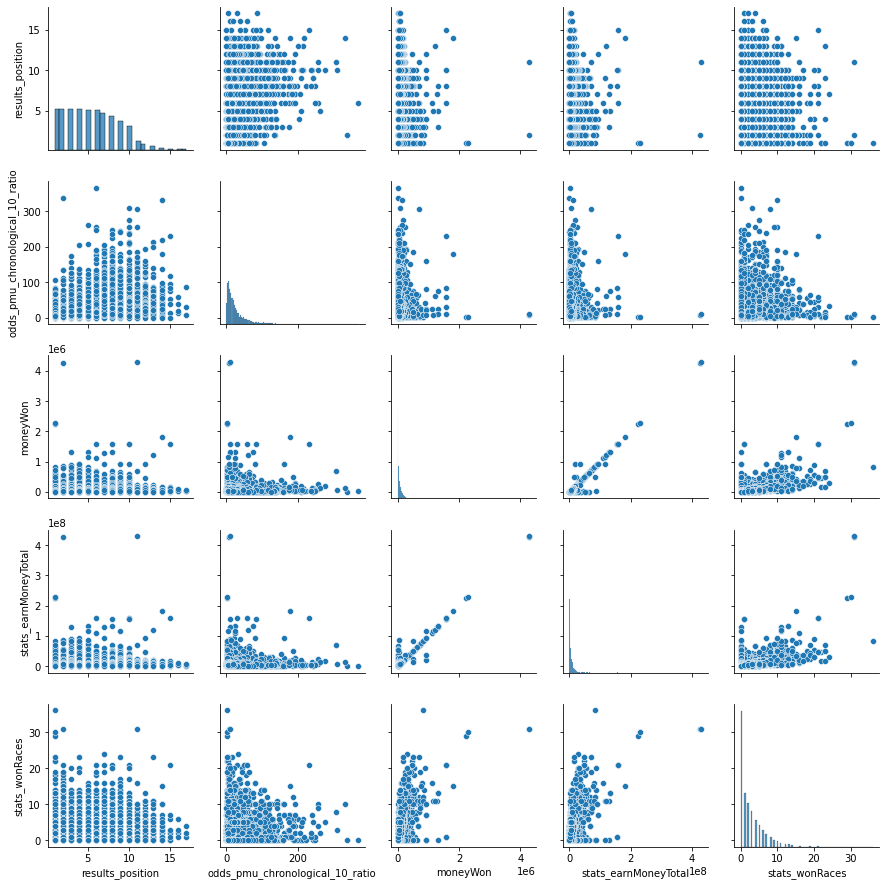

In [ ]:
sn.pairplot(df[['results_position', 'odds_pmu_chronological_10_ratio', 'moneyWon', 'stats_earnMoneyTotal', 'stats_wonRaces']].dropna())

In [ ]:
df[['results_position', 'partantNum', 'age', 'sex', 'stats_numberRaces',	'stats_wonRaces',	'stats_places',	'stats_secondPlaces',	'stats_thirdPlaces',	'stats_earnMoneyTotal']].dropna()

,results_position,partantNum,age,sex,stats_numberRaces,stats_wonRaces,stats_places,stats_secondPlaces,stats_thirdPlaces,stats_earnMoneyTotal
3,1.0,4,5,F,13.0,0.0,8.0,3.0,1.0,2042000.0
4,4.0,5,5,F,28.0,1.0,15.0,0.0,1.0,2056000.0
5,3.0,6,5,F,18.0,2.0,7.0,0.0,1.0,2655000.0
9,5.0,10,5,F,24.0,1.0,10.0,4.0,1.0,3090000.0
10,2.0,11,5,F,21.0,2.0,7.0,1.0,1.0,3258000.0
...,...,...,...,...,...,...,...,...,...,...
16578,10.0,6,7,M,0.0,0.0,0.0,0.0,0.0,3455000.0
16579,9.0,8,6,F,0.0,0.0,0.0,0.0,0.0,3597700.0
16580,7.0,9,8,M,0.0,0.0,0.0,0.0,0.0,3757000.0
16581,2.0,10,7,M,0.0,0.0,0.0,0.0,0.0,3774000.0
